In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load timing results from results.csv. Data is gathered by submitting to Perlmutter with scripts located in scripts/ dir
CSV_FILE="data/regular-run-results.csv"  

In [6]:
def plot_runs(csv_file): 
    df = pd.read_csv(csv_file)
    df = df.groupby("CPU", as_index=False).mean()
    df = df.sort_values(by="CPU")

    # Compute speedup (T1/TP)
    baseline_time = df[df["CPU"] == df["CPU"].min()]["Time"].values[0]
    df["Speedup"] = baseline_time / df["Time"]

    plt.figure(figsize=(8,6))
    plt.plot(df["CPU"], df["Speedup"], marker='o', label="Measured Speedup")

    plt.xscale("log", base=2)
    plt.xlabel("Number of CPUs")
    plt.ylabel("Speedup")
    plt.title("Hmmsearch Benchmarking")


    plt.show()

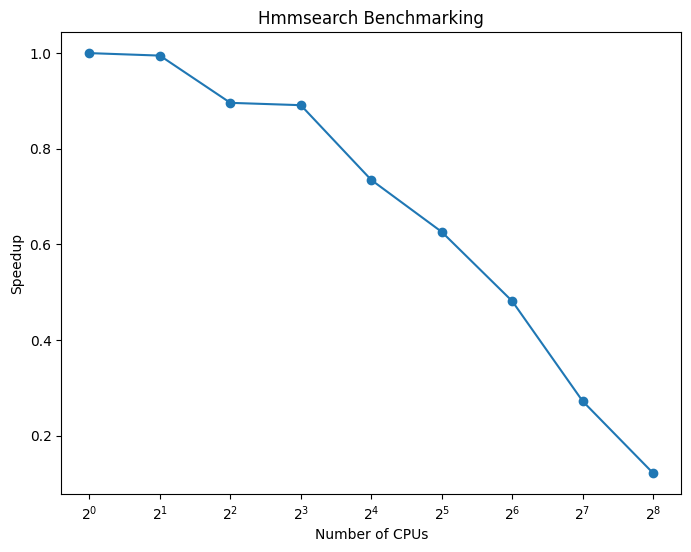

In [7]:
plot_runs(CSV_FILE)